# **Dataset Download**

---



In [ ]:
!gdown --id '11jMosGQlDv2o0tU3pnCSYnyWHT83s8vY'
!gdown --id '1f7IlAN7mLJnXOp8X_aqayrjO9tLmos_o'

Downloading...
From: https://drive.google.com/uc?id=11jMosGQlDv2o0tU3pnCSYnyWHT83s8vY
To: /content/test.csv
19.3MB [00:00, 90.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1f7IlAN7mLJnXOp8X_aqayrjO9tLmos_o
To: /content/train.csv
48.1MB [00:00, 150MB/s]


# **Imports**

---



In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
### To create plots
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import seaborn as sns
# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.calibration import CalibratedClassifierCV
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")

# **Confusion Matrix Plot Definition**

---



In [ ]:
lbls=["LAYING", "STANDING", "SITTING", "WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize = (12,8))
    ax.grid(False)
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Oranges)
    ax.figure.colorbar(im, ax = ax)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_xticklabels([''] + lbls)
    ax.set_yticklabels([''] + lbls)
    plt.xticks(rotation=90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black", fontsize=16)
            fig.tight_layout()

# **Data Load**

---



In [ ]:
train_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')


In [ ]:
train_data.shape

(7352, 563)

In [ ]:
test_data.shape

(2947, 563)

In [ ]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

# **Data Cleaning**

---



## **Duplicate Check**

In [ ]:
#check for duplicate values in dataset
print('No. of duplicates in train data: {}'.format(sum(train_data.duplicated())))
print('No. of duplicates in test data: {}'.format(sum(test_data.duplicated())))

No. of duplicates in train data: 0
No. of duplicates in test data: 0


## **NaN/null values Check**

In [ ]:
#check for NaN values
print('We have {} NaN/Null values in train'.format(train_data.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test_data.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## **Class Imbalance Check**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

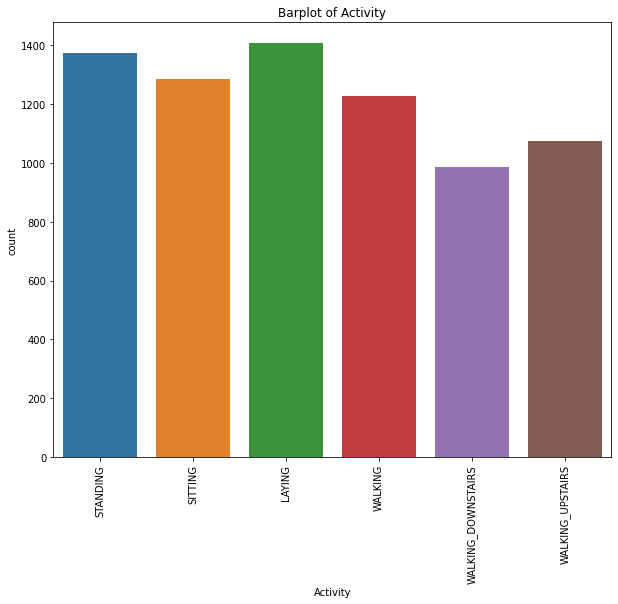

In [ ]:
#checking for class imbalance
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train_data.Activity)
plt.xticks(rotation=90)

## **Data Imbalance Check**

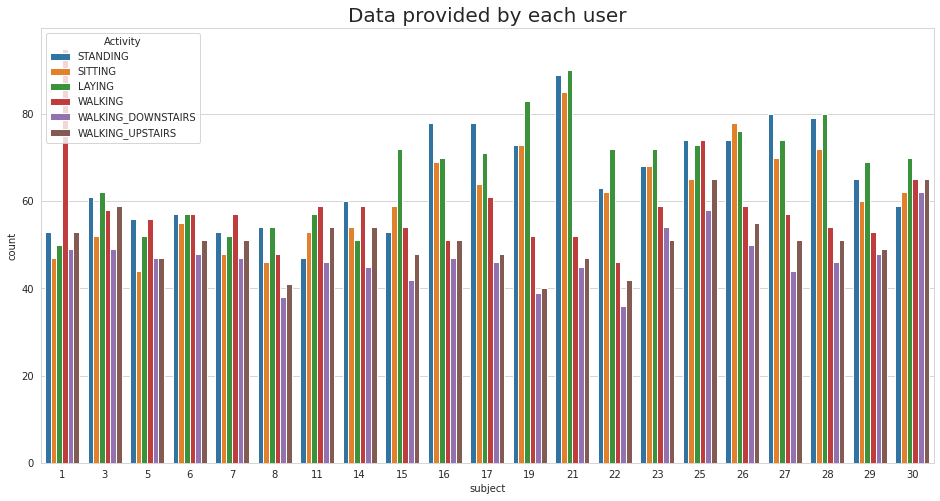

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train_data)
plt.show()

## **Correcting Feature Names**

In [ ]:
columns = train_data.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')
train_data.columns = columns
test_data.columns = columns

In [ ]:
train_data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
model_score = pd.DataFrame(columns = ("Model","SelectionProcess","Score"))

# **Encoder**

---



In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode target labels with value between 0 and n_classes-1.
le = LabelEncoder()
le.fit(train_data['Activity'])
train_data['Activity'] = le.transform(train_data['Activity'])
test_data['Activity'] = le.transform(test_data['Activity'])
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
X = train_data.drop(['Activity', 'subject'], axis=1)
y = train_data['Activity']

X_test = test_data.drop(['Activity', 'subject'], axis=1)
y_test = test_data['Activity']

In [ ]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(7352, 561)
(7352,)
(2947, 561)
(2947,)


# **Feature Selection**

---



## **Tree_based feature selection**

In [ ]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
features = X
label = y
test_features = X_test
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)
New_test_features = model.transform(test_features)
print(New_features.shape)
print(New_test_features.shape)

(7352, 158)
(2947, 158)


## **L1-based feature selection**

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter = 4000).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
New_features_2 = model_2.transform(features)
New_test_features_2 = model_2.transform(test_features)
print(New_features_2.shape)
print(New_test_features_2.shape)

(7352, 109)
(2947, 109)


## **L2-based feature selection**

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, dual=False, max_iter = 4000).fit(features, label)
model_3 = SelectFromModel(lsvc, prefit=True)
New_features_3 = model_3.transform(features)
New_test_features_3 = model_3.transform(test_features)
print(New_features_3.shape)
print(New_test_features_3.shape)

(7352, 182)
(2947, 182)


## **PCA feature selection**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca = pca.fit(features);
X_pca = pca.transform(features)
X_pca_test = pca.transform(test_features)
print(X_pca.shape)
print(X_pca_test.shape)

(7352, 50)
(2947, 50)


# **Bagging Classifier**

---



In [ ]:
from sklearn.ensemble import BaggingClassifier

oob_list = list()
# Because the algorithm is so slow, we use just 4 different trees to see the outcomes.
tree_list = [20, 40, 50, 100] 

for n_trees in tree_list:
    BC = BaggingClassifier(n_estimators=n_trees, oob_score=True, random_state=42, n_jobs=-1)
    BC.fit(New_features_3, y)
    oob_error = 1 - BC.oob_score_   # Get the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

err_bag = pd.concat(oob_list, axis=1).T.set_index('n_trees')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


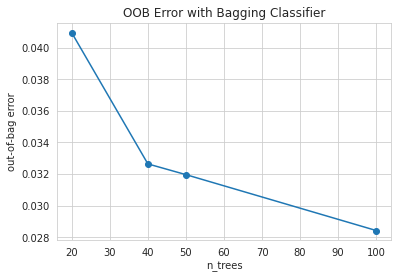

In [ ]:
# Plot the result
ax = err_bag.plot(legend=False, marker='o')
ax.set_ylabel('out-of-bag error')
ax.set_title('OOB Error with Bagging Classifier')
plt.show()

In [ ]:
# Bagging Classifier with 50 estimators
model = BaggingClassifier(n_estimators=50, oob_score=True, random_state=42, n_jobs=-1)
model = model.fit(New_features_3, y)
y_pred = model.predict(New_test_features_3)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.87      0.80      0.83       491
           2       0.83      0.89      0.86       532
           3       0.82      0.95      0.88       496
           4       0.92      0.83      0.87       420
           5       0.82      0.77      0.79       471

    accuracy                           0.88      2947
   macro avg       0.88      0.87      0.87      2947
weighted avg       0.88      0.88      0.87      2947



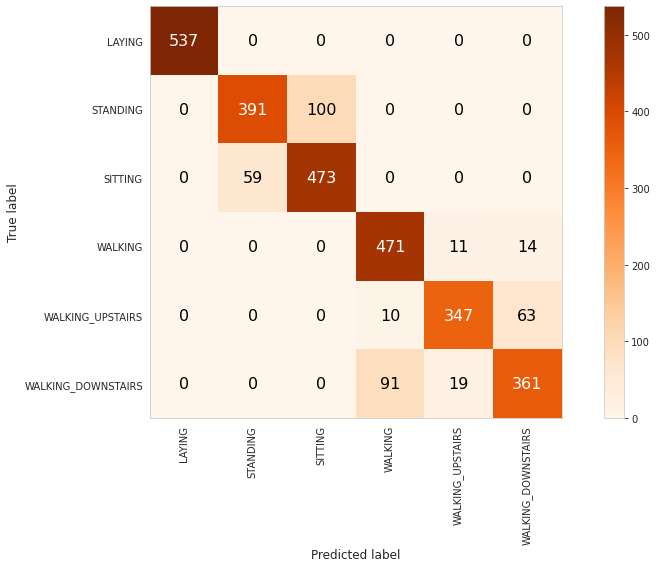

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

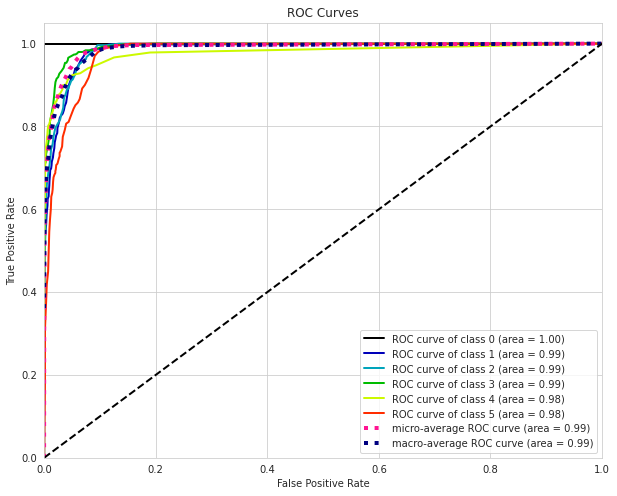

In [ ]:
y_probas = model.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **Random Forest Classifier**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)

oob_list = list()
tree_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

for n_trees in tree_list:
    RF.set_params(n_estimators=n_trees)
    RF.fit(New_features_3, y)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
    
err_rf = pd.concat(oob_list, axis=1).T.set_index('n_trees')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


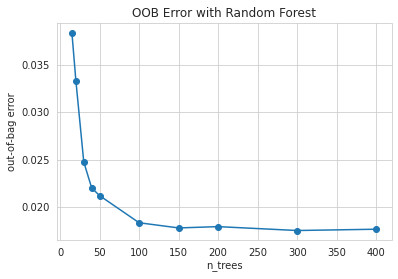

In [ ]:
# Plot the result
ax = err_rf.plot(legend=False, marker='o')
ax.set_ylabel('out-of-bag error')
ax.set_title('OOB Error with Random Forest')
plt.show()

In [ ]:
# Random Forest with 100 estimators
model = RF.set_params(n_estimators=100)
y_pred = model.predict(New_test_features_3)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.87      0.83      0.85       491
           2       0.85      0.89      0.87       532
           3       0.86      0.95      0.90       496
           4       0.97      0.83      0.89       420
           5       0.85      0.86      0.86       471

    accuracy                           0.90      2947
   macro avg       0.90      0.89      0.90      2947
weighted avg       0.90      0.90      0.90      2947



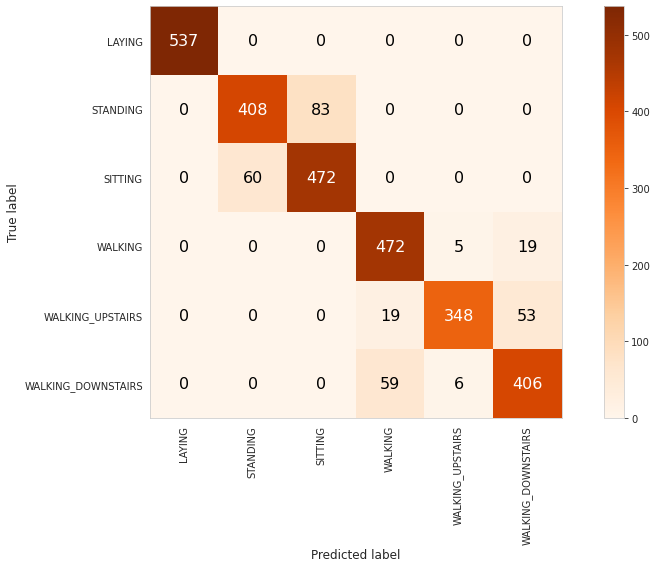

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

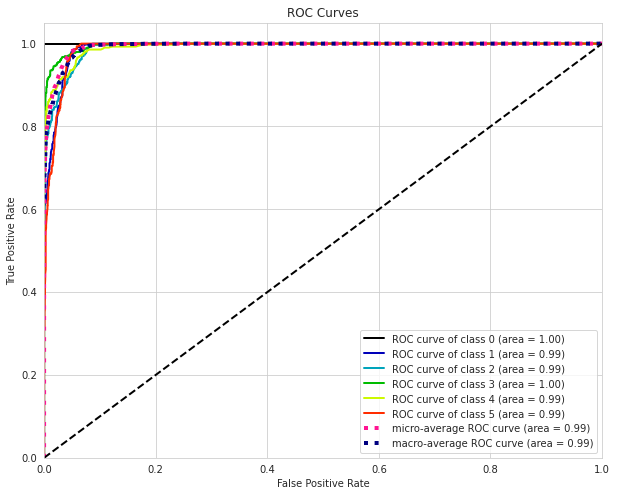

In [ ]:
y_probas = model.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **Extra Trees Classifier**

---



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier(oob_score=True, bootstrap=True, random_state=42, warm_start=True, n_jobs=-1)

oob_list = list()
tree_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

for n_trees in tree_list:
    ET.set_params(n_estimators=n_trees)
    ET.fit(New_features_3, y)
    oob_error = 1 - ET.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
    
err_et = pd.concat(oob_list, axis=1).T.set_index('n_trees')

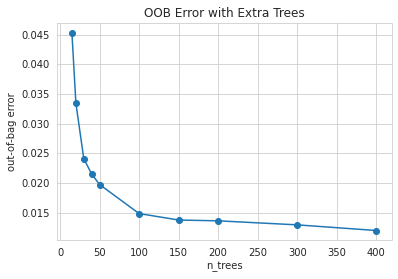

In [ ]:
# Plot the result
ax = err_et.plot(legend=False, marker='o')
ax.set_ylabel('out-of-bag error')
ax.set_title('OOB Error with Extra Trees')
plt.show()

In [ ]:
# Extra Trees with 100 estimators
model = ET.set_params(n_estimators=100)
y_pred = model.predict(New_test_features_3)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.86      0.90       491
           2       0.88      0.94      0.91       532
           3       0.91      0.96      0.93       496
           4       0.97      0.85      0.90       420
           5       0.88      0.92      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



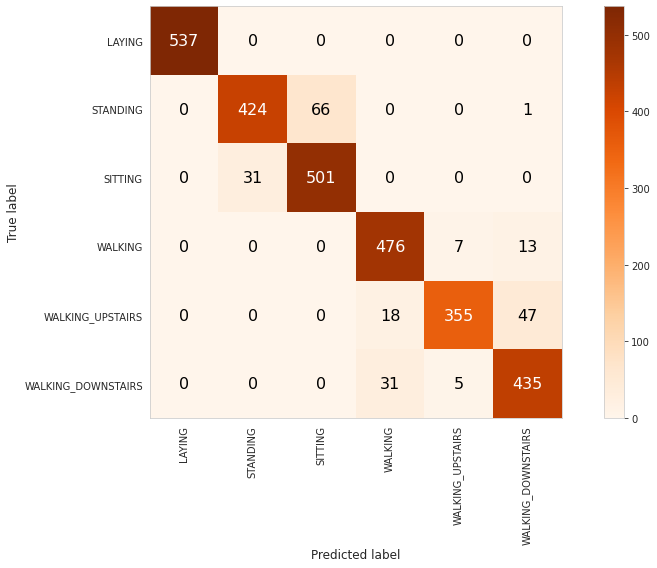

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

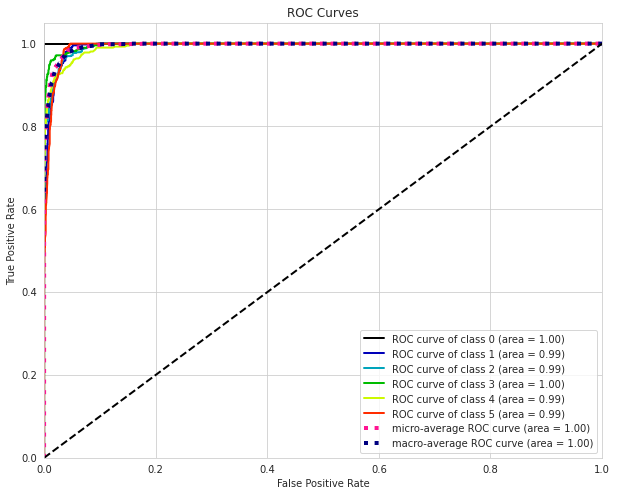

In [ ]:
y_probas = model.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **Gradient Boosting Classifier**

---



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

error_list = list()

# Iterate through all of the possibilities for number of estimators
tree_list = [15, 50, 100, 200, 400]
for n_trees in tree_list:
    GBC = GradientBoostingClassifier(n_estimators=n_trees, subsample=0.5,
                                     max_features=4, random_state=42)
    GBC.fit(New_features_3, y)
    y_pred = GBC.predict(New_test_features_3)

    # Get the error
    error = 1. - accuracy_score(y_test, y_pred)
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

err_gbc = pd.concat(error_list, axis=1).T.set_index('n_trees')

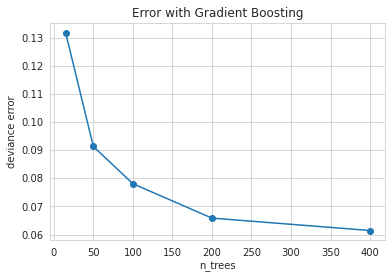

In [ ]:
# Plot the result
ax = err_gbc.plot(legend=False, marker='o')
ax.set_ylabel('deviance error')
ax.set_title('Error with Gradient Boosting')
plt.show()

In [ ]:
# Extra Trees with 100 estimators
model = GradientBoostingClassifier(n_estimators=100, subsample=0.5,
                                     max_features=5, random_state=42)
model.fit(New_features_3, y)
y_pred = model.predict(New_test_features_3)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.90      0.89      0.90       491
           2       0.90      0.91      0.91       532
           3       0.90      0.96      0.93       496
           4       0.98      0.88      0.92       420
           5       0.89      0.92      0.91       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



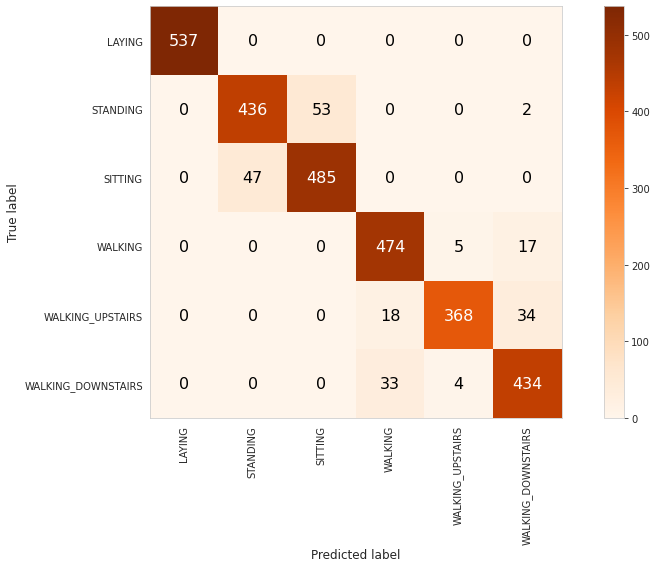

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

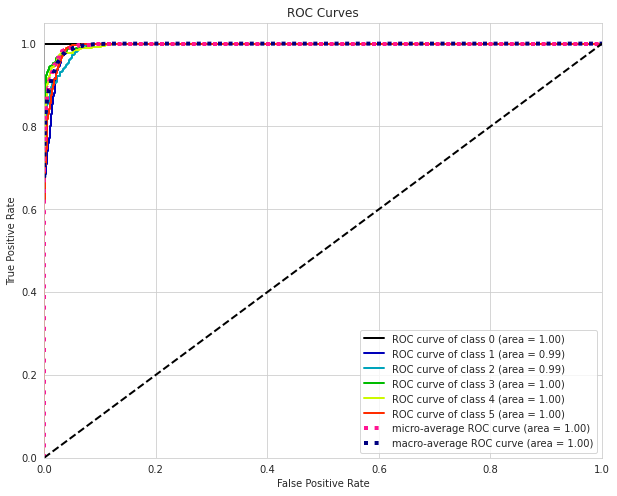

In [ ]:
y_probas = model.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **AdaBoost Classifier**

---



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

error_list = list()

# Iterate through all of the possibilities for number of estimators
tree_list = [15, 50, 100, 200, 400]

# Setting max_features=4 in the decision tree classifier used as the base classifier 
# for AdaBoost will increase the convergence rate
base = DecisionTreeClassifier(max_features=4)
for n_trees in tree_list:
    ABC = AdaBoostClassifier(base_estimator=base, n_estimators=n_trees, 
                             learning_rate=0.1, random_state=42)
    ABC.fit(New_features_3, y)
    y_pred = ABC.predict(New_test_features_3)

    # Get the error
    error = 1. - accuracy_score(y_test, y_pred)
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

err_abc = pd.concat(error_list, axis=1).T.set_index('n_trees')

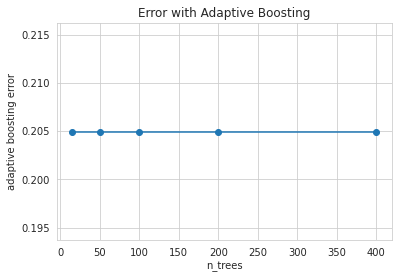

In [ ]:
# Plot the result
ax = err_abc.plot(legend=False, marker='o')
ax.set_ylabel('adaptive boosting error')
ax.set_title('Error with Adaptive Boosting')
plt.show()

In [ ]:
model = AdaBoostClassifier(base_estimator=base, n_estimators=50, 
                             learning_rate=0.1, random_state=42)
model.fit(New_features_3, y)
y_pred = model.predict(New_test_features_3)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       537
           1       0.77      0.69      0.72       491
           2       0.74      0.80      0.77       532
           3       0.77      0.81      0.79       496
           4       0.75      0.70      0.73       420
           5       0.76      0.77      0.77       471

    accuracy                           0.80      2947
   macro avg       0.79      0.79      0.79      2947
weighted avg       0.80      0.80      0.79      2947



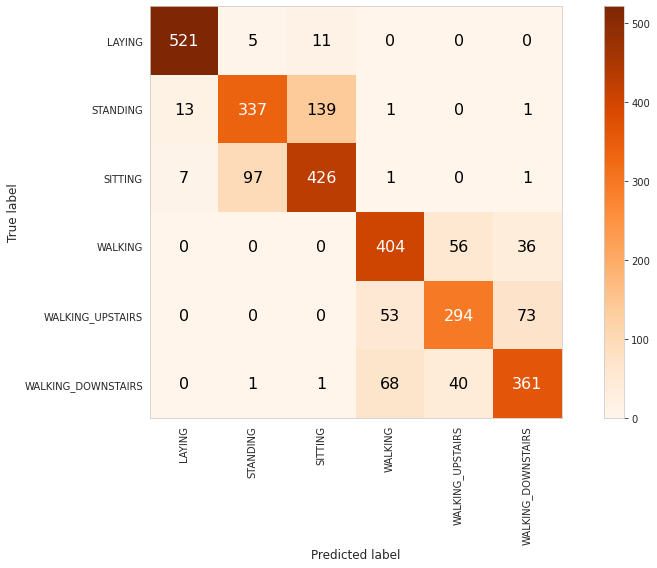

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

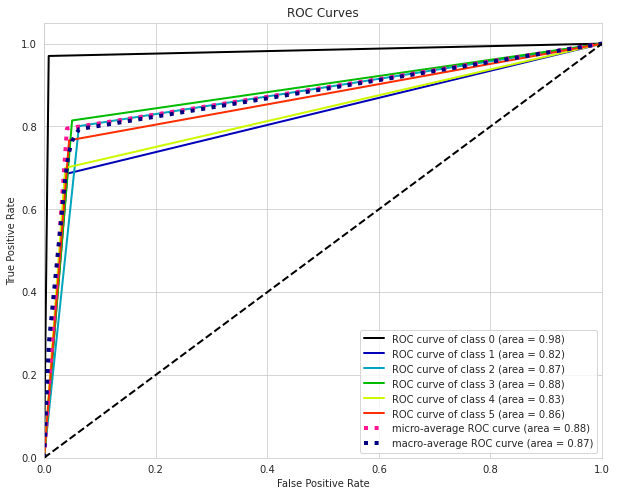

In [ ]:
y_probas = model.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **Logistic Regression**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
parameters = {'C':np.arange(10,61,10)}
lr_classifier = LogisticRegression(max_iter=1000,
                                   random_state=42)
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, random_state = 42, n_iter = 10)


In [ ]:
lr_classifier_rs.fit(New_features_3, y)
y_pred = lr_classifier_rs.predict(New_test_features_3)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.89      0.93       491
           2       0.91      0.97      0.94       532
           3       0.96      0.99      0.97       496
           4       0.99      0.98      0.98       420
           5       0.97      0.96      0.96       471

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.96      2947



In [ ]:
# model_score = model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[lr_accuracy]}))

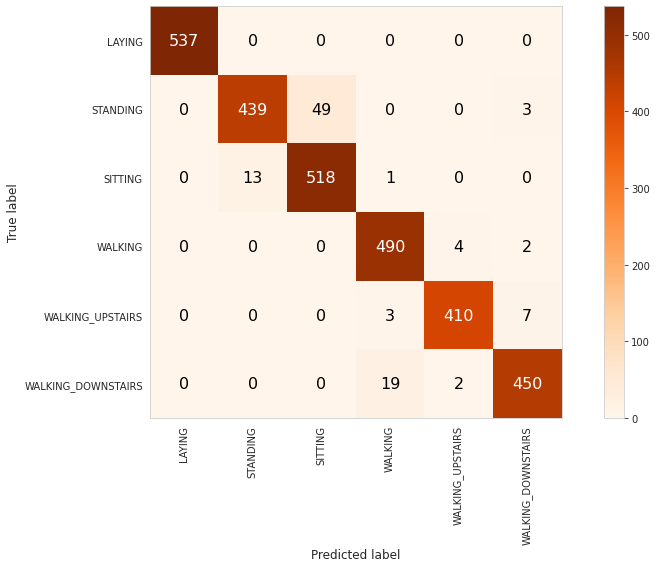

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

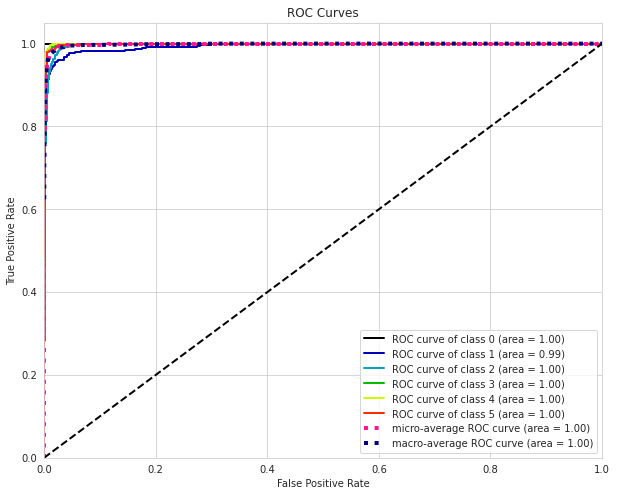

In [ ]:
y_probas = lr_classifier_rs.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **Linear SVM**

---



In [ ]:
from sklearn.svm import LinearSVC
parameters = {'C': np.arange(1,12,2)}
lr_svm = LinearSVC(tol = 0.00005)
clf = CalibratedClassifierCV(lr_svm)

In [ ]:
clf.fit(New_features_3, y)
y_pred = clf.predict(New_test_features_3)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.88      0.92       491
           2       0.90      0.97      0.94       532
           3       0.96      0.99      0.97       496
           4       1.00      0.97      0.98       420
           5       0.96      0.96      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[lr_svm_accuracy]}))

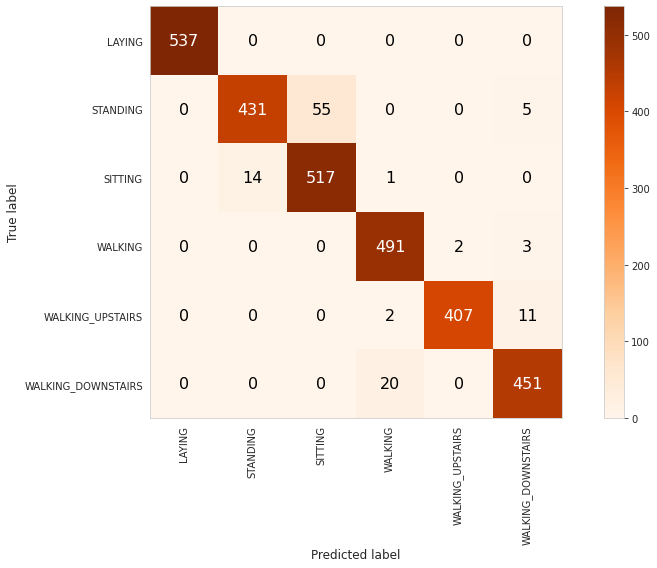

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

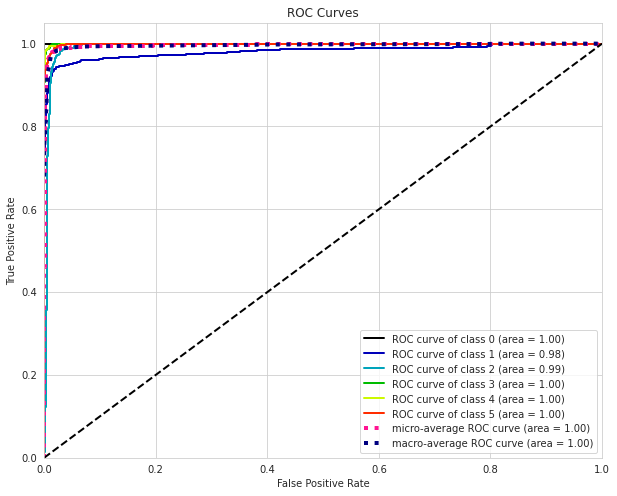

In [ ]:
y_probas = clf.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

# **Stacking**

---



## **stack Logistic regression with Gradient Boosting to make a new classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR', lr_classifier_rs), ('GBC', GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft', n_jobs=-1)
VC.fit(New_features_3, y)

VotingClassifier(estimators=[('LR',
                              RandomizedSearchCV(cv=None, error_score=nan,
                                                 estimator=LogisticRegression(C=1.0,
                                                                              class_weight=None,
                                                                              dual=False,
                                                                              fit_intercept=True,
                                                                              intercept_scaling=1,
                                                                              l1_ratio=None,
                                                                              max_iter=1000,
                                                                              multi_class='auto',
                                                                              n_jobs=None,
                                             

In [ ]:
y_pred = VC.predict(New_test_features_3)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.89      0.92       491
           2       0.91      0.97      0.94       532
           3       0.95      0.98      0.96       496
           4       0.99      0.96      0.97       420
           5       0.95      0.94      0.94       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



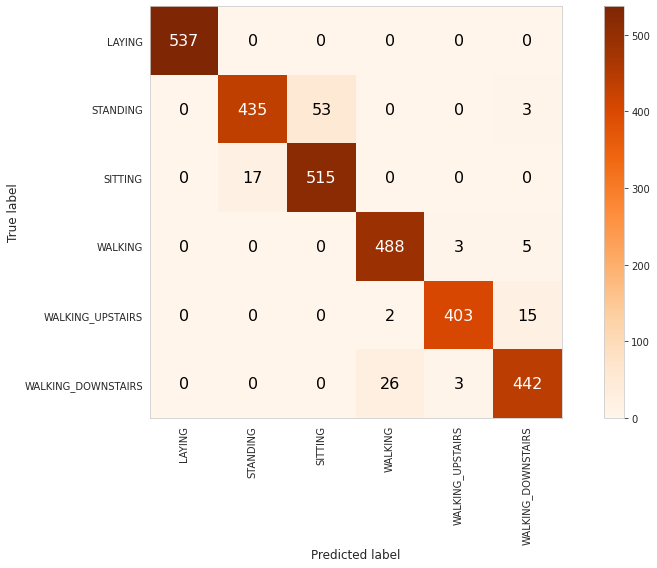

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm)

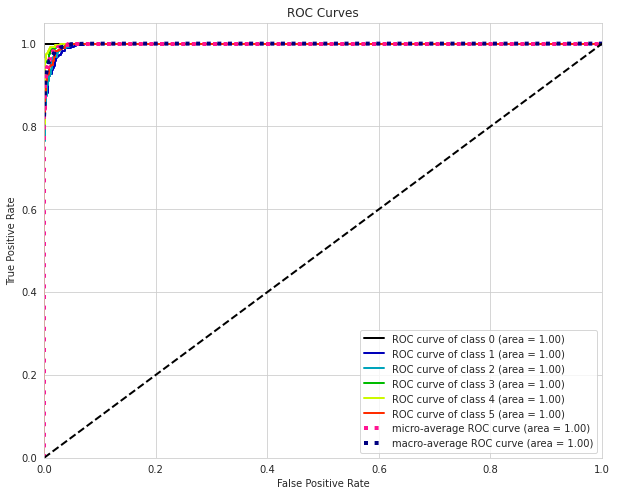

In [ ]:
y_probas = VC.predict_proba(New_test_features_3)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()